In [1]:
import warnings
import umap

import numpy as np
import pandas as pd

from sklearn import decomposition

from news_vec.encoder import read_preds

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
warnings.simplefilter('ignore')
alt.data_transformers.enable('default', max_rows=None)
pd.options.display.max_rows = 500

In [4]:
df, embeds = read_preds('../../data/ava-lstm-attn/')

100%|██████████| 283/283 [00:16<00:00, 17.27it/s]


In [5]:
DOMAINS = list(df.domain.unique())

In [6]:
df['p_true'] = df.apply(lambda r: r[f'p_{r.domain}'], 1)

In [7]:
df['label'] = df.apply(lambda r: '%s - %s' % (r.domain, ' '.join(r.clf_tokens)), 1)

In [8]:
df.groupby('domain').size()

domain
apnews.com            18808
bloomberg.com         18808
breitbart.com         18808
buzzfeed.com          18808
cnn.com               18808
dailycaller.com       18808
dailykos.com          18808
foxnews.com           18808
huffingtonpost.com    18808
msnbc.com             18808
npr.org               18808
nytimes.com           18808
thehill.com           18808
washingtonpost.com    18808
wsj.com               18808
dtype: int64

# p-true distributions

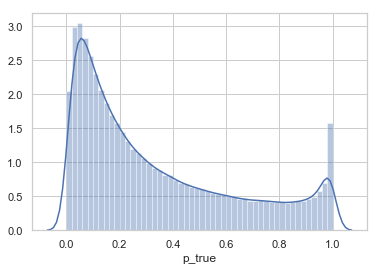

In [9]:
sns.distplot(df.p_true)

breitbart.com


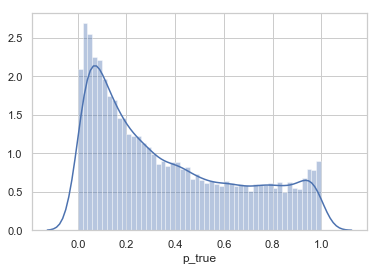

cnn.com


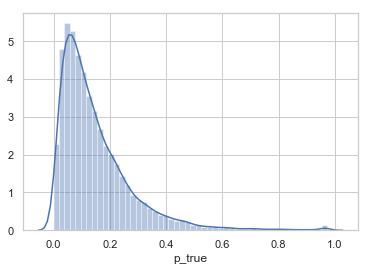

nytimes.com


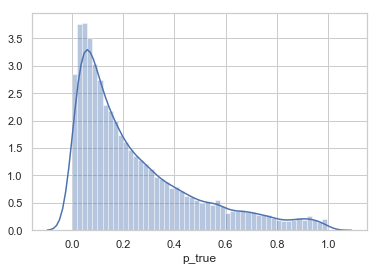

bloomberg.com


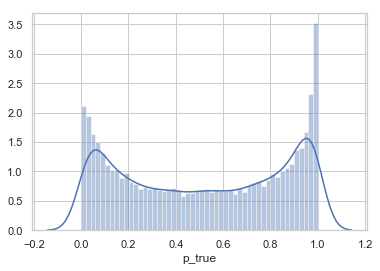

dailycaller.com


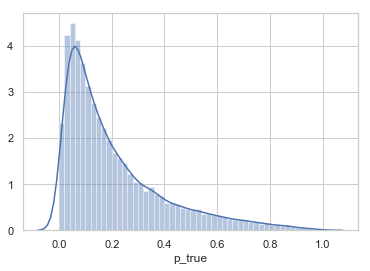

apnews.com


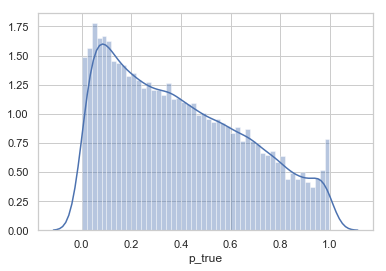

buzzfeed.com


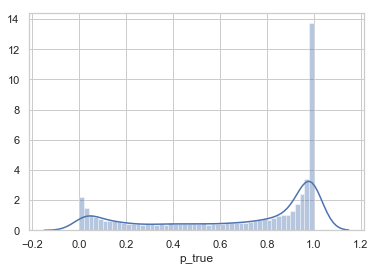

washingtonpost.com


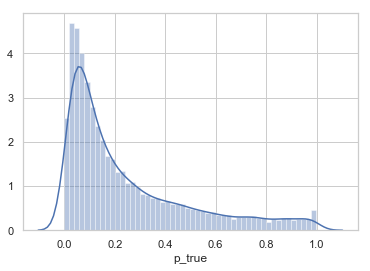

huffingtonpost.com


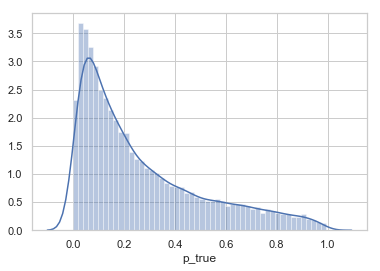

foxnews.com


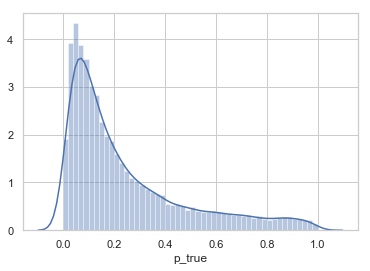

wsj.com


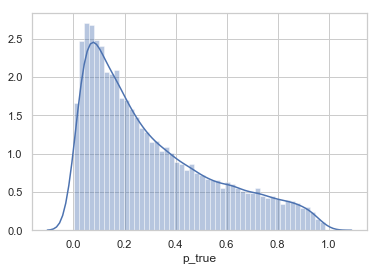

npr.org


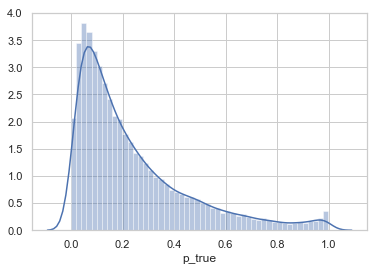

msnbc.com


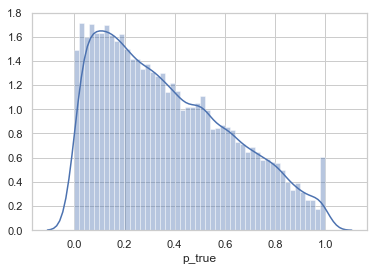

thehill.com


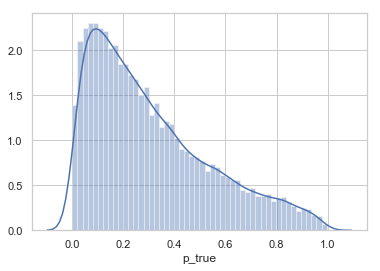

dailykos.com


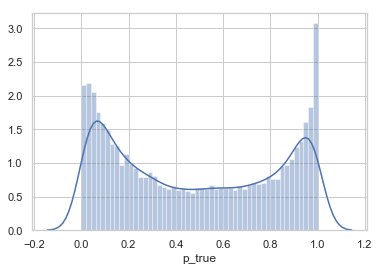

In [10]:
for d in DOMAINS:
    print(d)
    sns.distplot(df[df.domain==d].p_true, bins=50)
    plt.show()

In [12]:
df.sort_values('p_true', ascending=False)[['domain', 'title', 'p_true', 'impressions']].head(10)

,domain,title,p_true,impressions
245726,buzzfeed.com,Choose Some Christmas Aesthetic Pictures And W...,1.000000,12611
131888,buzzfeed.com,Answer These Random Questions And We 'll Tell ...,1.000000,16218
64634,buzzfeed.com,Pick Some Clothes And We 'll Tell You Which Di...,1.000000,15180
70431,buzzfeed.com,Tell Us Your Initials And We 'll Tell You Whic...,0.999998,83706
46544,buzzfeed.com,Choose Some Desserts From Around The World And...,0.999998,14995
206186,buzzfeed.com,Answer Ten Questions And We 'll Tell You Which...,0.999998,30918
71210,buzzfeed.com,Answer These Yes Or No Questions And We 'll Te...,0.999998,12038
129231,buzzfeed.com,Pick Some Disney Characters And We 'll Tell Yo...,0.999998,107112
193883,buzzfeed.com,Pick Some Disney Characters And We 'll Tell Yo...,0.999998,10675
17277,buzzfeed.com,Pick Some Members Of These Famous TV Families ...,0.999998,95053


# p-true > 0.9

In [13]:
t10 = df[df.p_true > 0.9]
t10_embeds = embeds[t10.index]

dr = umap.UMAP(metric='cosine', verbose=True)
embedding = dr.fit_transform(t10_embeds)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='cosine',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  14
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	 8  /  14
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


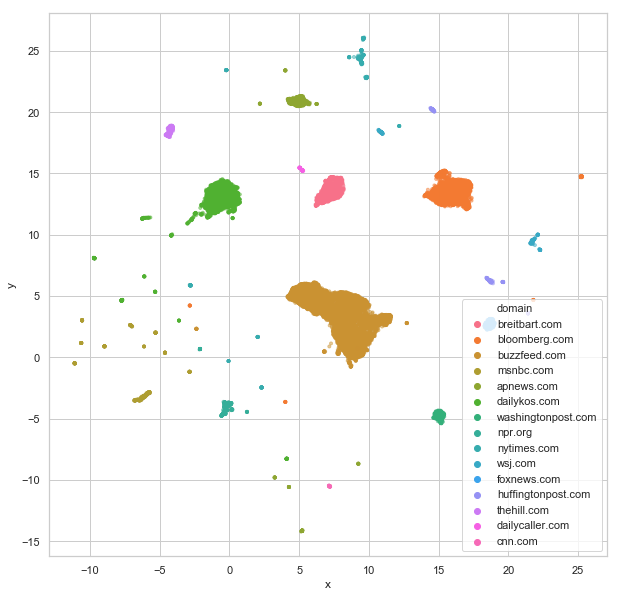

In [14]:
points = t10.copy()
points['x'] = embedding[:,0]
points['y'] = embedding[:,1]

points = points[['domain', 'label', 'p_true', 'x', 'y']]

plt.figure(figsize=(10,10))

sns.scatterplot(
    x='x', y='y',
    data=points,
    s=10,
    edgecolor=None,
    alpha=0.5,
    hue='domain',
)

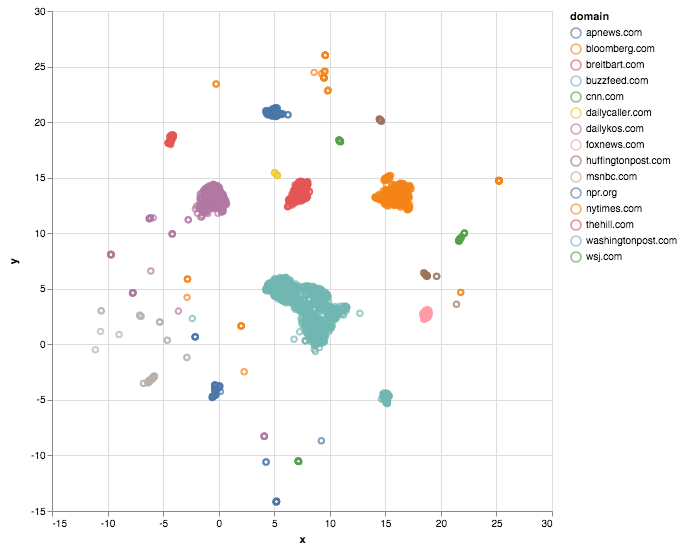

In [15]:
(alt
    .Chart(points.sample(frac=0.1), width=500, height=500)
    .mark_point()
    .encode(x='x', y='y', tooltip='label', color='domain'))